In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 1T\[MT10] Series de Tiempo\Clases prácticas\Práctica 0-20250322\gendata.xlsx"
df = pd.read_excel(path)
df.head()

,y1,y2,y3,y4,y5
0,0.933895,1.203655,0.127276,-0.627108,1.514516
1,1.723346,1.425864,1.038572,-1.617540,1.480403
2,1.564982,1.426851,1.426594,1.151779,-0.344754
3,0.752551,3.088713,1.247394,0.994978,1.550536
4,-0.116989,2.558566,0.028583,-0.018541,2.364941


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      1000 non-null   float64
 1   y2      1000 non-null   float64
 2   y3      1000 non-null   float64
 3   y4      1000 non-null   float64
 4   y5      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


Veremos procedimiento Box - Jenkins.
1. Determinar si la serie es estacionaria. Por el momento, solo se analizará gráfiamente;
2. Analizar el correlograma
3. Determinar bondad mediante los criterios de información.

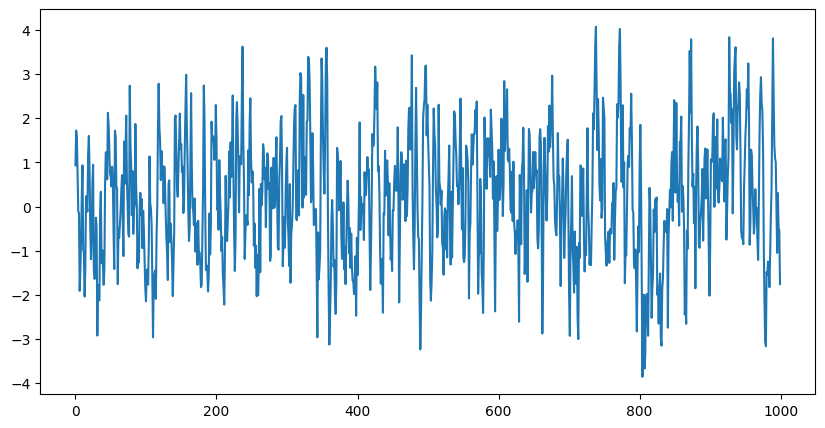

In [38]:
df['y1'].plot(figsize=(10,5));

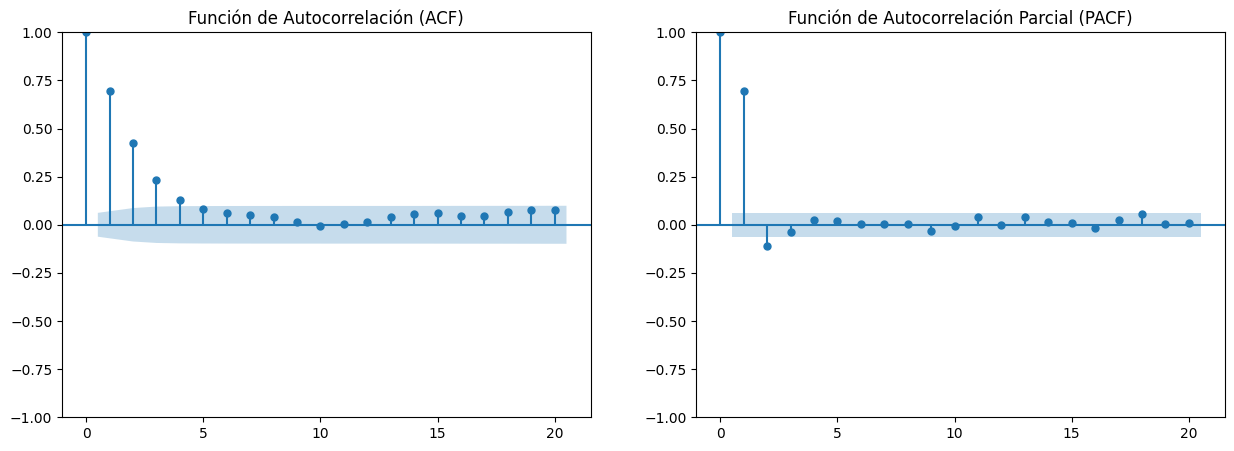

In [39]:
serie_1 = df["y1"]

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(serie_1, lags=20, ax=axes[0])  # Correlograma de autocorrelaciones (ACF)
plot_pacf(serie_1, lags=20, ax=axes[1])  # Correlograma de autocorrelaciones parciales (PACF)

axes[0].set_title("Función de Autocorrelación (ACF)")
axes[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.show()

Puede inferirse que se trata de un AR(1), dado que PACF se va a prácticamente cero luego del lag 1, al tiempo de que ACF nunca es práctimente cero. Primero se intenrará con un AR(1), luego con un AR(2)

In [40]:
# Calcular ACF y PACF numéricamente
acf_values = acf(serie_1, nlags=20)
pacf_values = pacf(serie_1, nlags=20)

# Crear un DataFrame con los resultados
correlograma = pd.DataFrame({"Lag": np.arange(len(acf_values)), "ACF": np.round(acf_values,3), "PACF": np.round(pacf_values,3)})

print(correlograma)

    Lag    ACF   PACF
0     0  1.000  1.000
1     1  0.694  0.695
2     2  0.425 -0.111
3     3  0.231 -0.038
4     4  0.129  0.024
5     5  0.083  0.019
6     6  0.061  0.006
7     7  0.048  0.005
8     8  0.039  0.003
9     9  0.014 -0.031
10   10 -0.006 -0.006
11   11  0.004  0.040
12   12  0.013 -0.002
13   13  0.039  0.042
14   14  0.055  0.014
15   15  0.062  0.011
16   16  0.048 -0.017
17   17  0.044  0.026
18   18  0.065  0.055
19   19  0.076  0.003
20   20  0.076  0.007


In [41]:
# Calcular ACF y PACF
acf_values = acf(serie_1, nlags=20)
pacf_values = pacf(serie_1, nlags=20)

# Calcular la prueba de Ljung-Box (QStat y p-valor)
ljung_box = acorr_ljungbox(serie_1, lags=20, return_df=True)

# Crear DataFrame con los resultados
correlograma = pd.DataFrame({
    "Lag": np.arange(1, 21),  # Ajustamos los lags desde 1
    "ACF": np.round(acf_values[1:21], 3),  # Excluimos lag 0
    "PACF": np.round(pacf_values[1:21], 3),
    "QStat": np.round(ljung_box["lb_stat"].values, 2), #En cada rezago, la H0 es: la correlación con el lag anterior y todos los anteriores, ¿es cero? 
    "p-value": np.round(ljung_box["lb_pvalue"].values, 2)
})

# Mostrar resultados
print(correlograma)

    Lag    ACF   PACF   QStat  p-value
0     1  0.694  0.695  483.17      0.0
1     2  0.425 -0.111  664.16      0.0
2     3  0.231 -0.038  717.86      0.0
3     4  0.129  0.024  734.51      0.0
4     5  0.083  0.019  741.40      0.0
5     6  0.061  0.006  745.15      0.0
6     7  0.048  0.005  747.52      0.0
7     8  0.039  0.003  749.03      0.0
8     9  0.014 -0.031  749.22      0.0
9    10 -0.006 -0.006  749.26      0.0
10   11  0.004  0.040  749.28      0.0
11   12  0.013 -0.002  749.45      0.0
12   13  0.039  0.042  750.96      0.0
13   14  0.055  0.014  754.08      0.0
14   15  0.062  0.011  758.01      0.0
15   16  0.048 -0.017  760.32      0.0
16   17  0.044  0.026  762.27      0.0
17   18  0.065  0.055  766.58      0.0
18   19  0.076  0.003  772.49      0.0
19   20  0.076  0.007  778.39      0.0


In [42]:
# # Crear la variable rezagada
# df["y1_lag"] = df["y1"].shift(1)

# # Eliminar NaN (por el rezago)
# df = df.dropna()

# # Definir la variable dependiente y la independiente
# y = df["y1"]
# X = df["y1_lag"]

# # Agregar constante para el intercepto
# X = sm.add_constant(X)

# # Ajustar el modelo por MCO (OLS)
# modelo = sm.OLS(y, X).fit()

# # Resumen del modelo
# print(modelo.summary())

In [43]:
# Ajustar un modelo AR(1) usando Máxima Verosimilitud
modelo_mle = sm.tsa.ARIMA(df["y1"], order=(1,0,0)).fit()

# Resumen del modelo (similar a EViews)
print(modelo_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1426.243
Date:                Sun, 30 Mar 2025   AIC                           2858.487
Time:                        14:02:39   BIC                           2873.210
Sample:                             0   HQIC                          2864.083
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.104      1.948      0.051      -0.001       0.408
ar.L1          0.6949      0.024     29.285      0.000       0.648       0.741
sigma2         1.0140      0.047     21.552      0.0

In [51]:
# Obtener residuos del modelo ajustado
residuos = modelo_mle.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos, nlags=36)
pacf_values = sm.tsa.pacf(residuos, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos)

    Lag    ACF   PACF  Q-Stat  p-value
0     1  0.078  0.078   6.081    0.014
1     2 -0.026 -0.032   6.735    0.034
2     3 -0.079 -0.076  13.075    0.004
3     4 -0.054 -0.043  16.025    0.003
4     5 -0.016 -0.013  16.286    0.006
5     6 -0.000 -0.007  16.286    0.012
6     7  0.005 -0.003  16.308    0.022
7     8  0.028  0.024  17.087    0.029
8     9 -0.004 -0.010  17.105    0.047
9    10 -0.042 -0.041  18.867    0.042
10   11 -0.000  0.009  18.867    0.064
11   12 -0.022 -0.024  19.377    0.080
12   13  0.018  0.016  19.710    0.103
13   14  0.023  0.017  20.240    0.123
14   15  0.040  0.035  21.837    0.112
15   16 -0.004 -0.010  21.856    0.148
16   17 -0.025 -0.019  22.508    0.166
17   18  0.026  0.040  23.183    0.184
18   19  0.030  0.027  24.075    0.193
19   20  0.020  0.015  24.492    0.222
20   21  0.018  0.021  24.841    0.254
21   22 -0.009 -0.007  24.917    0.301
22   23  0.033  0.043  26.045    0.299
23   24  0.055  0.059  29.165    0.214
24   25  0.001  0.002  29

Para tener un buen ajuste, los residuos del modelo deben sera aleatorios o comportarse como ruido blanco, siendo independientes entre ellos. Por lo tanto, no debe haber correlaciones entre los lags. Por lo tanto, los p-values deben ser distintos de cero, grandes. 

En anterior, los primeros lags son pequeños. Lo cual indica que el modelo no captura la estructura de los datos. 

Intentemos con un AR(2).

In [52]:
# Ajustar un modelo AR(2) usando Máxima Verosimilitud
modelo_mle_ar2 = sm.tsa.ARIMA(df["y1"], order=(2,0,0)).fit()

# Resumen del modelo (similar a EViews)
print(modelo_mle_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                     y1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1420.052
Date:                Sun, 30 Mar 2025   AIC                           2848.104
Time:                        14:15:26   BIC                           2867.735
Sample:                             0   HQIC                          2855.565
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2035      0.093      2.178      0.029       0.020       0.387
ar.L1          0.7721      0.032     24.057      0.000       0.709       0.835
ar.L2         -0.1110      0.032     -3.470      0.0

In [53]:
# Obtener residuos del modelo ajustado
residuos2 = modelo_mle_ar2.resid

# Calcular ACF y PACF de los residuos
acf_values = sm.tsa.acf(residuos2, nlags=36)
pacf_values = sm.tsa.pacf(residuos2, nlags=36)

# Prueba de Ljung-Box (Q-Statistics)
ljung_box = acorr_ljungbox(residuos2, lags=36, return_df=True)

# Crear DataFrame con los resultados
correlograma_residuos2 = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": np.round(ljung_box["lb_pvalue"].values, 3)
})

# Mostrar tabla
print(correlograma_residuos2)

    Lag    ACF   PACF  Q-Stat  p-value
0     1 -0.003 -0.003   0.011    0.918
1     2  0.028  0.028   0.816    0.665
2     3 -0.031 -0.031   1.782    0.619
3     4 -0.018 -0.019   2.114    0.715
4     5  0.004  0.006   2.134    0.830
5     6  0.009  0.009   2.212    0.899
6     7  0.006  0.004   2.243    0.945
7     8  0.030  0.029   3.127    0.926
8     9  0.000  0.001   3.127    0.959
9    10 -0.038 -0.040   4.604    0.916
10   11  0.010  0.012   4.702    0.945
11   12 -0.022 -0.019   5.196    0.951
12   13  0.021  0.018   5.639    0.958
13   14  0.018  0.018   5.972    0.967
14   15  0.040  0.040   7.639    0.937
15   16 -0.000 -0.001   7.639    0.959
16   17 -0.021 -0.021   8.077    0.965
17   18  0.031  0.037   9.037    0.959
18   19  0.029  0.031   9.882    0.956
19   20  0.020  0.016  10.281    0.963
20   21  0.024  0.023  10.862    0.965
21   22 -0.008 -0.009  10.931    0.976
22   23  0.031  0.032  11.932    0.971
23   24  0.052  0.057  14.717    0.929
24   25 -0.002  0.001  14

In [55]:
# Crear DataFrame con los resultados, omitiendo los p-valores para los primeros lags
correlograma_residuos2 = pd.DataFrame({
    "Lag": np.arange(1, 37),
    "ACF": np.round(acf_values[1:37], 3),
    "PACF": np.round(pacf_values[1:37], 3),
    "Q-Stat": np.round(ljung_box["lb_stat"].values, 3),
    "p-value": [None if i < 2 else np.round(ljung_box["lb_pvalue"].values[i], 3) for i in range(36)]
})

# Mostrar tabla
print(correlograma_residuos2)


    Lag    ACF   PACF  Q-Stat  p-value
0     1 -0.003 -0.003   0.011      NaN
1     2  0.028  0.028   0.816      NaN
2     3 -0.031 -0.031   1.782    0.619
3     4 -0.018 -0.019   2.114    0.715
4     5  0.004  0.006   2.134    0.830
5     6  0.009  0.009   2.212    0.899
6     7  0.006  0.004   2.243    0.945
7     8  0.030  0.029   3.127    0.926
8     9  0.000  0.001   3.127    0.959
9    10 -0.038 -0.040   4.604    0.916
10   11  0.010  0.012   4.702    0.945
11   12 -0.022 -0.019   5.196    0.951
12   13  0.021  0.018   5.639    0.958
13   14  0.018  0.018   5.972    0.967
14   15  0.040  0.040   7.639    0.937
15   16 -0.000 -0.001   7.639    0.959
16   17 -0.021 -0.021   8.077    0.965
17   18  0.031  0.037   9.037    0.959
18   19  0.029  0.031   9.882    0.956
19   20  0.020  0.016  10.281    0.963
20   21  0.024  0.023  10.862    0.965
21   22 -0.008 -0.009  10.931    0.976
22   23  0.031  0.032  11.932    0.971
23   24  0.052  0.057  14.717    0.929
24   25 -0.002  0.001  14

Con AR(2) se han logrado limpiar los residuos, por lo que el modelo capta la estructura de los datos. 

In [57]:
# Ajustar residuos y calcular ACF y PACF después de normalización
residuos2_normalizados = residuos2 / np.std(residuos2)

# Calcular ACF y PACF de los residuos normalizados
acf_values_normalizados = sm.tsa.acf(residuos2_normalizados, nlags=36)
pacf_values_normalizados = sm.tsa.pacf(residuos2_normalizados, nlags=36)

# Prueba de Ljung-Box para residuos normalizados
ljung_box_normalizados = acorr_ljungbox(residuos2_normalizados, lags=36, return_df=True)

ljung_box_normalizados


,lb_stat,lb_pvalue
1,0.010521,0.918302
2,0.816395,0.664848
3,1.782159,0.618825
4,2.114271,0.714751
5,2.133651,0.830360
6,2.211989,0.899206
7,2.243244,0.945160
8,3.126643,0.926160
9,3.126644,0.959061
10,4.603954,0.916018
